# Assumptions of Multiple Linear Regression
> Implementation of assumptions in python

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
import statsmodels.api as sm
import pylab as py

In [3]:
data = pd.read_csv("Fish.csv")
data

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340
...,...,...,...,...,...,...,...
154,Smelt,12.2,11.5,12.2,13.4,2.0904,1.3936
155,Smelt,13.4,11.7,12.4,13.5,2.4300,1.2690
156,Smelt,12.2,12.1,13.0,13.8,2.2770,1.2558
157,Smelt,19.7,13.2,14.3,15.2,2.8728,2.0672


In [4]:
x = data[['Length1','Length2','Length3','Height','Width']]
y = data['Weight']

In [5]:
from sklearn import linear_model

In [6]:
regr = linear_model.LinearRegression()
regr.fit(x, y)

LinearRegression()

In [7]:
print(regr.coef_)

[ 62.35521443  -6.52675249 -29.02621861  28.29735132  22.47330665]


# check linearity

Text(0, 0.5, 'Weight cm')

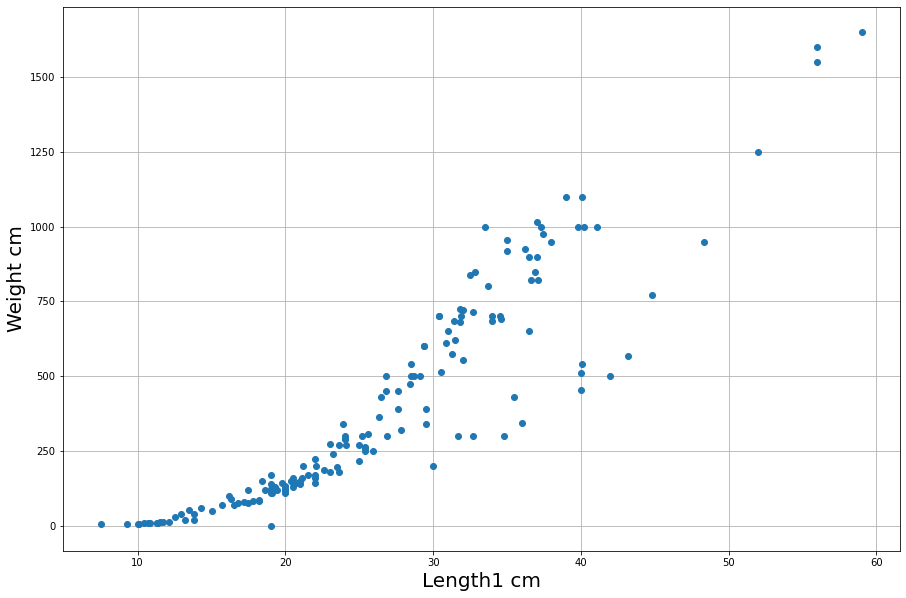

In [8]:
fig = plt.figure(figsize=(15,10))
plt.plot(data['Length1'],data['Weight'],'o')
plt.grid()
plt.xlabel("Length1 cm", fontsize=20)
plt.ylabel("Weight cm",  fontsize=20)

Text(0, 0.5, 'Weight cm')

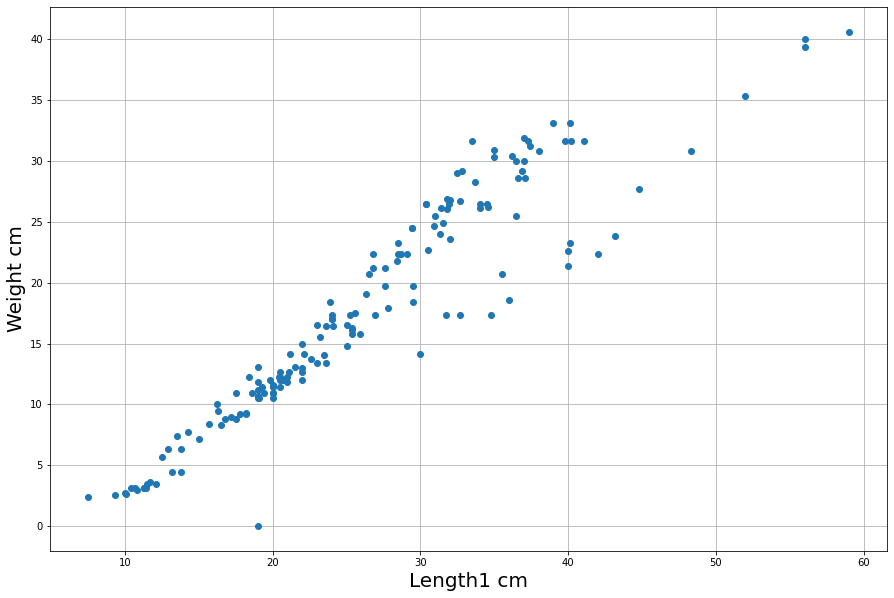

In [9]:
fig = plt.figure(figsize=(15,10))
plt.plot(data['Length1'],np.sqrt(data['Weight']),'o')
plt.grid()
plt.xlabel("Length1 cm", fontsize=20)
plt.ylabel("Weight cm",  fontsize=20)

C:\Users\ADNAN\anaconda3\lib\site-packages\pandas\core\arraylike.py:364: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


Text(0, 0.5, 'Weight cm')

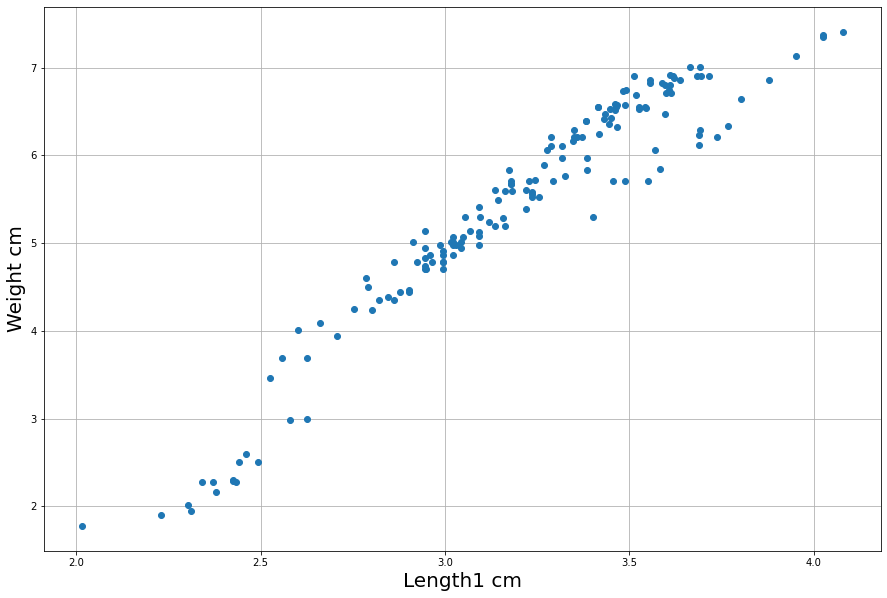

In [10]:
fig = plt.figure(figsize=(15,10))
plt.plot(np.log(data['Length1']),np.log(data['Weight']),'o')
plt.grid()
plt.xlabel("Length1 cm", fontsize=20)
plt.ylabel("Weight cm",  fontsize=20)

# check VIF for multicolinearity

In [11]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [12]:
x = data[['Length1','Length2','Length3','Height','Width','Weight']]
vif_data = pd.DataFrame()
vif_data["feature"] = x.columns
  
# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(x.values, i)
                          for i in range(len(x.columns))]
  
print(vif_data)

   feature           VIF
0  Length1  13551.449805
1  Length2  16775.194678
2  Length3   3561.912619
3   Height     83.402186
4    Width     94.052933
5   Weight      6.832973


# Pearson coefficient for multicolinearity

In [13]:
# from scipy.stats import pearsonr
import seaborn as sns

In [14]:
matrix = data.corr(
    method = 'pearson',  # The method of correlation
    min_periods = 1      # Min number of observations required
)

In [15]:
matrix

,Weight,Length1,Length2,Length3,Height,Width
Weight,1.000000,0.915712,0.918618,0.923044,0.724345,0.886507
Length1,0.915712,1.000000,0.999517,0.992031,0.625378,0.867050
Length2,0.918618,0.999517,1.000000,0.994103,0.640441,0.873547
Length3,0.923044,0.992031,0.994103,1.000000,0.703409,0.878520
Height,0.724345,0.625378,0.640441,0.703409,1.000000,0.792881
Width,0.886507,0.867050,0.873547,0.878520,0.792881,1.000000


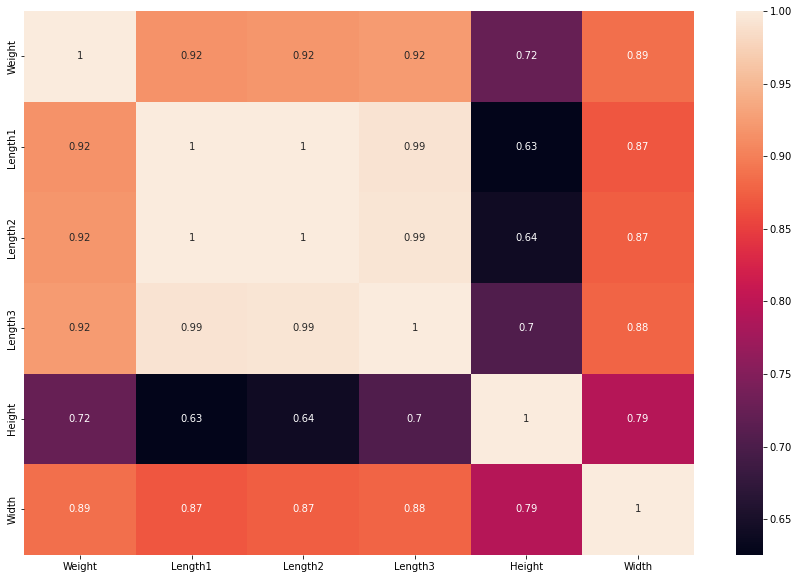

In [16]:
fig = plt.figure(figsize=(15,10))
sns.heatmap(matrix, annot=True)
plt.show()

# check homoscedasticity

In [17]:
x = data[['Length1']]
y = data['Weight']
regr = linear_model.LinearRegression()
model = regr.fit(x, y)

In [19]:
x

,Length1
0,23.2
1,24.0
2,23.9
3,26.3
4,26.5
...,...
154,11.5
155,11.7
156,12.1
157,13.2


In [18]:
model.score(x, y), model.coef_, model.intercept_

(0.8385279468768119, array([32.7921639]), -462.37507915831395)

In [25]:
line = model.coef_*x+model.intercept_

In [26]:
x

,Length1
0,23.2
1,24.0
2,23.9
3,26.3
4,26.5
...,...
154,11.5
155,11.7
156,12.1
157,13.2


In [27]:
model.predict(x)

array([ 298.40312322,  324.63685434,  321.35763795,  400.0588313 ,
        406.61726408,  416.45491325,  416.45491325,  442.68864436,
        442.68864436,  472.20159187,  468.92237548,  478.76002465,
        491.87689021,  504.99375577,  501.71453938,  501.71453938,
        534.50670327,  534.50670327,  550.90278522,  554.18200161,
        564.01965078,  567.29886717,  570.57808356,  580.41573273,
        583.69494912,  580.41573273,  586.97416551,  609.92868023,
        613.20789662,  636.16241135,  685.35065719,  685.35065719,
        724.70125387,  764.05185054,  783.72714888,  -39.3561649 ,
         78.69562512,  111.48778902,  134.44230374,  147.5591693 ,
        160.67603486,  163.95525125,  173.79290042,  206.58506432,
        209.8642807 ,  209.8642807 ,  226.26036265,  229.53957904,
        259.05252655,  259.05252655,  262.33174294,  311.51998878,
        324.63685434,  357.42901824,  504.99375577,  311.51998878,
        327.91607073,  377.10431657,  472.20159187,  642.72084

Text(0, 0.5, 'Weight cm')

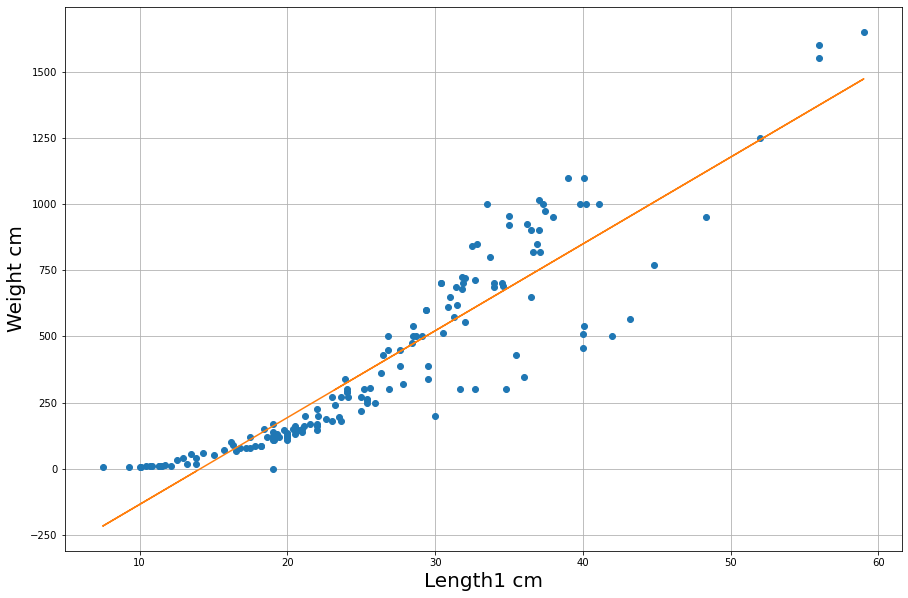

In [28]:
fig = plt.figure(figsize=(15,10))
plt.plot(x,y,'o')
plt.plot(x,line)
plt.grid()
plt.xlabel("Length1 cm", fontsize=20)
plt.ylabel("Weight cm",  fontsize=20)

In [29]:
res = y - model.predict(x)
res

0     -56.403123
1     -34.636854
2      18.642362
3     -37.058831
4      23.382736
         ...    
154    97.465194
155    92.106762
156    77.789896
157    49.218516
158    29.743217
Name: Weight, Length: 159, dtype: float64

Text(0, 0.5, 'Residuals')

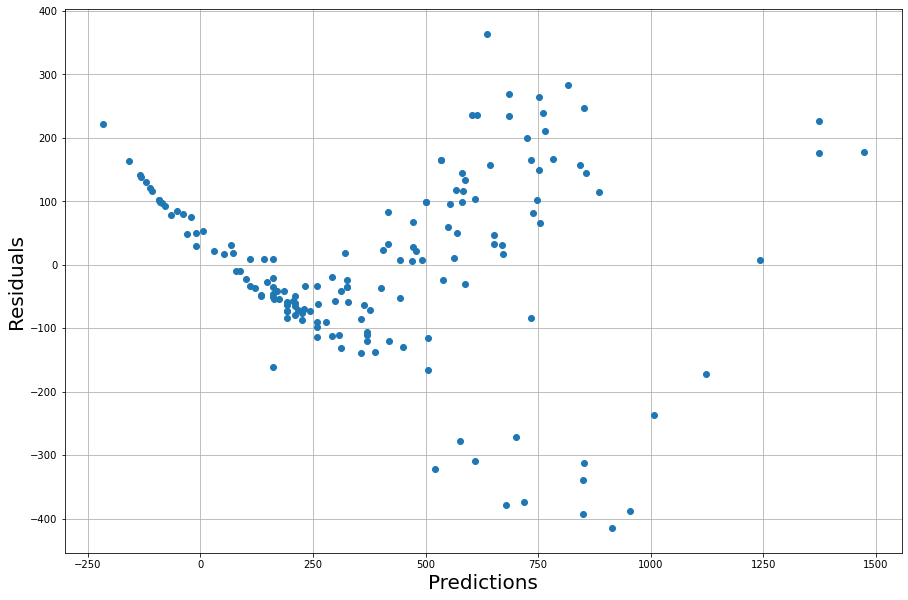

In [30]:
fig = plt.figure(figsize=(15,10))
plt.plot(model.predict(x),res,'o')
plt.grid()
plt.xlabel("Predictions", fontsize=20)
plt.ylabel("Residuals",  fontsize=20)

# check if the residuals are normally distributed

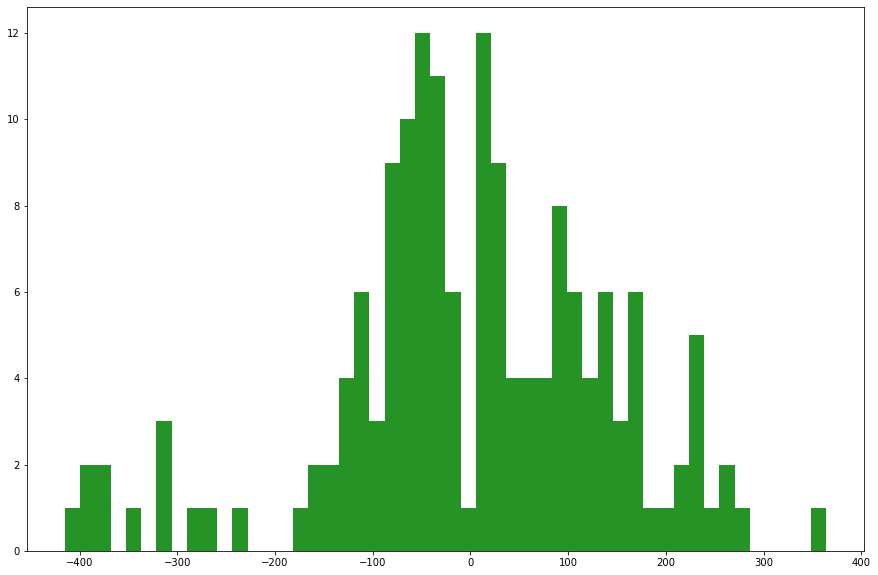

In [31]:
fig = plt.figure(figsize=(15,10))
n, bins, patches = plt.hist(res,50,facecolor='green', alpha=0.85)

<Figure size 1080x720 with 0 Axes>

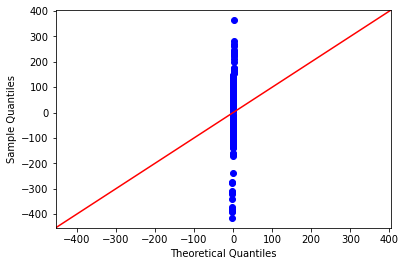

In [37]:
fig = plt.figure(figsize=(15,10))
sm.qqplot(res, line ='45')
py.show()

# check homoscedasticity for transformed data

In [31]:
data = data[data['Weight'] !=0]

In [32]:
# x = np.sqrt(np.log(data[['Length1']]))
# y = np.sqrt(np.log(data['Weight']))
x = np.log(data[['Length1']])
y = np.log(data['Weight'])
y.replace([np.inf, -np.inf], np.nan, inplace=True)
regr = linear_model.LinearRegression()
model = regr.fit(x, y)
line = model.coef_*x+model.intercept_

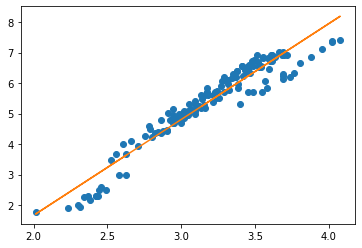

In [33]:
plt.plot(x,y,'o')
plt.plot(x,line)

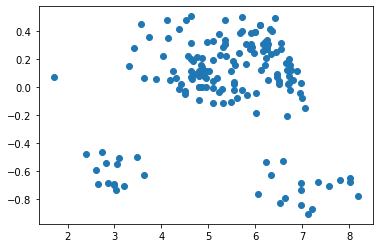

In [34]:
res = y - model.predict(x)
plt.plot(model.predict(x),res,'o')

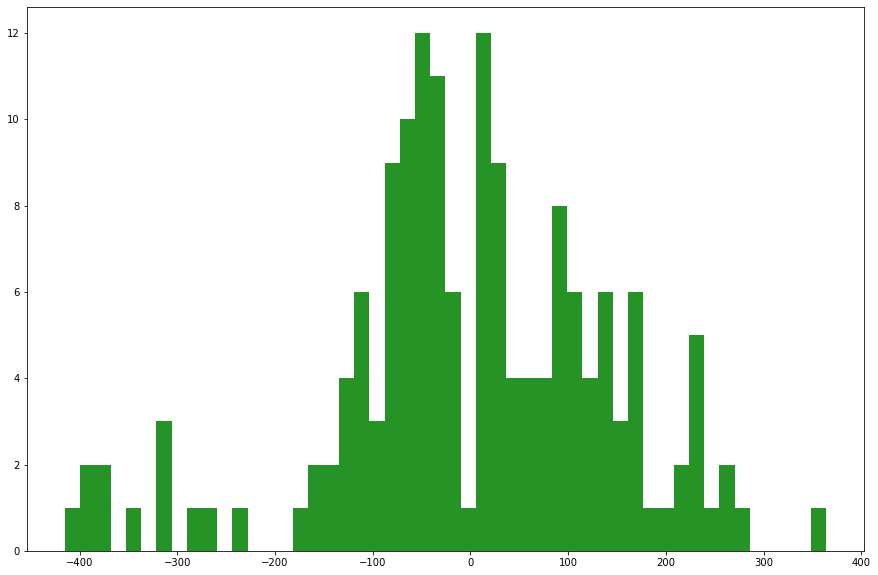

In [35]:
fig = plt.figure(figsize=(15,10))
n, bins, patches = plt.hist(res,50,facecolor='green', alpha=0.85)

<Figure size 1080x720 with 0 Axes>

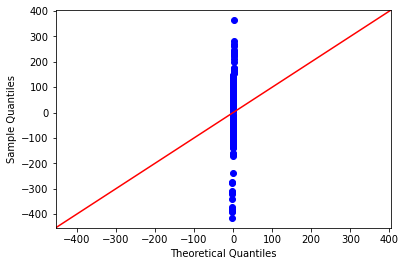

In [36]:
fig = plt.figure(figsize=(15,10))
sm.qqplot(res, line ='45')
py.show()

# check diamond data

In [56]:
diamond = pd.read_csv("diamonds.csv")
diamond

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
53935,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74


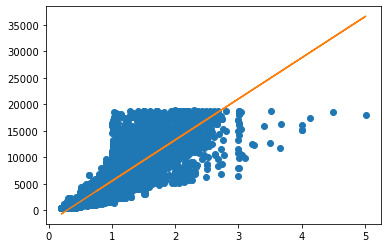

In [65]:
data = diamond
# x = np.log(data[['carat']])
# y = np.log(data['price'])

x = (data[['carat']])
y = (data['price'])

y.replace([np.inf, -np.inf], np.nan, inplace=True)
regr = linear_model.LinearRegression()
model = regr.fit(x, y)
line = model.coef_*x+model.intercept_

plt.plot(x,y,'o')
plt.plot(x,line)

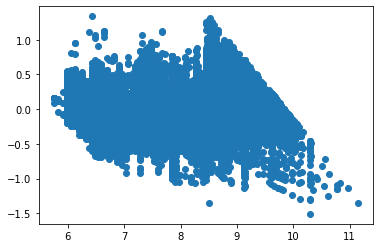

In [62]:
res = y - model.predict(x)
plt.plot(model.predict(x),res,'o')

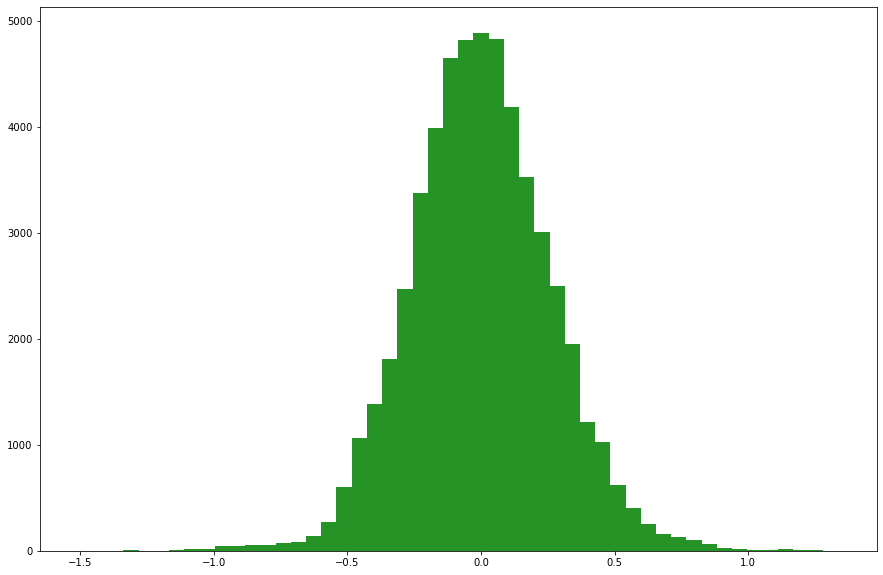

In [63]:
fig = plt.figure(figsize=(15,10))
n, bins, patches = plt.hist(res,50,facecolor='green', alpha=0.85)

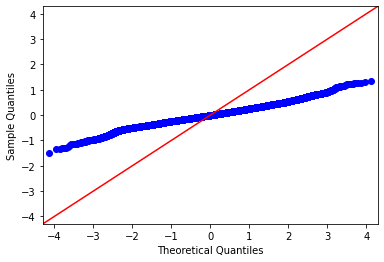

In [64]:
sm.qqplot(res, line ='45')
py.show()

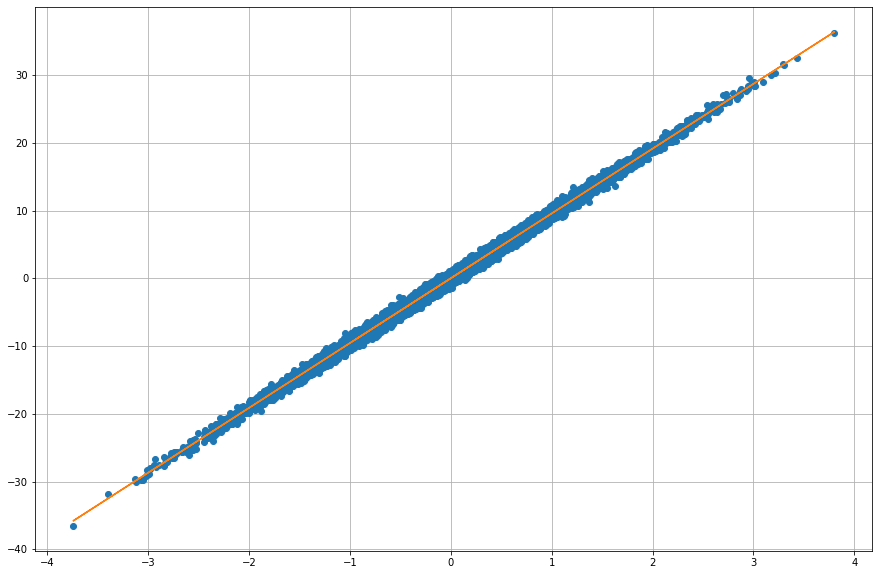

In [39]:
from sklearn import datasets
import matplotlib.pyplot as plt #for plotting

x, y, coef = datasets.make_regression(n_samples=10000,#number of samples
                                      n_features=1,#number of features
                                      n_informative=1,#number of useful features 
                                      noise=0.5,#bias and standard deviation of the guassian noise
                                      coef=True,#true coefficient used to generated the data
                                      random_state=0) #set for same data points for each run

regr = linear_model.LinearRegression()
model = regr.fit(x, y)
line = model.coef_*x+model.intercept_

fig = plt.figure(figsize=(15,10))
plt.plot(x,y,'o')
plt.plot(x,line)
plt.grid()

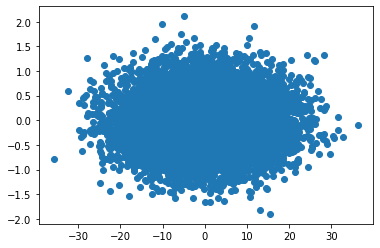

In [40]:
res = y - model.predict(x)
plt.plot(model.predict(x),res,'o')

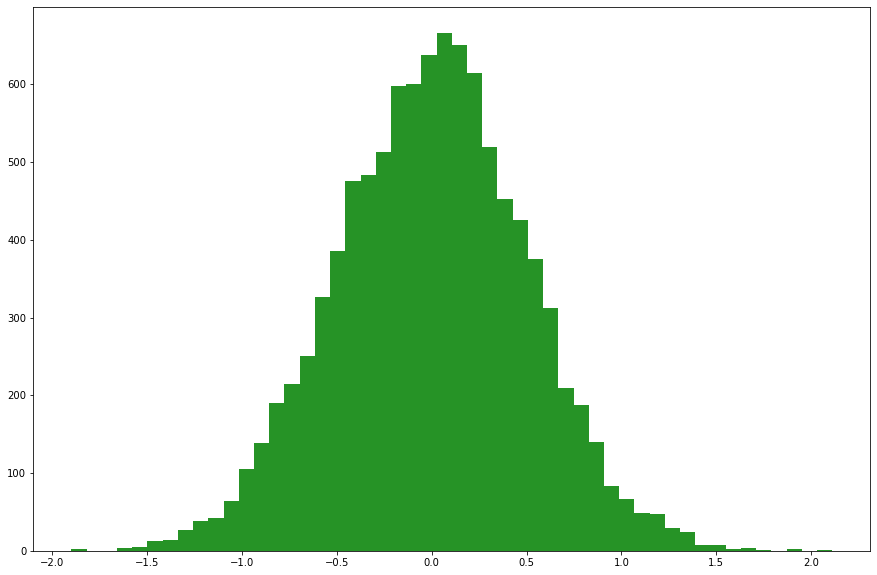

In [41]:
fig = plt.figure(figsize=(15,10))
n, bins, patches = plt.hist(res,50,facecolor='green', alpha=0.85)

<Figure size 1080x720 with 0 Axes>

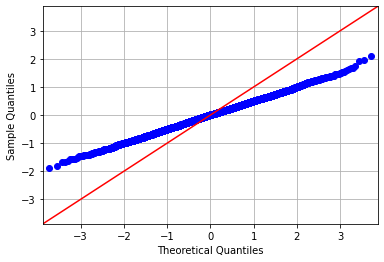

In [45]:
fig = plt.figure(figsize=(15,10))
sm.qqplot(res, line ='45')
plt.grid()
py.show()